# Problem 1. IMBA-SHAP: Spam Detection (40 pts)

In this problem, you will revisit the spam detection problem. This time, you will tackle this as an imbalanced ML problem--employing the concepts you've learned in working with imbalanced datasets. Read and execute carefully the instructions provided. The first part of exploring the data has already been done for you. 

<div class="alert alert-info">
    
**Important Notes**

You are already given the following:
    
`X` : **bag of words (features)**</br>
`y` : **target/indicator of Spam (1 - spam, 0 - ham)**
</div>

## Context

After estabilishing Mr. Peter Wayne's spider web inspired building, his business is up and running. However, recently, he was bombarded with spam emails and he badly needs your help again!

His company reported that there has been a proliferation of spam messages in their communications platform. His employees  is complaining of the flooding of spam messages, often resulting to cluttering of one's inbox. Mr. Wayne then decides to take a less tolerant approach in detecting spam messages. Keeping this in mind, *decide which metric is most suitable in designing your spam detector. And be prepared to justify that in your dealings with Mr. Wayne.*

Mr. Wayne stated that he will be happy to initially deploy a detector with an $80\%$ performance on the correct metric. However, he doesn't prefer Naive Bayes models due to their apparent simplicity. Beat the $80\%$ performance baseline in predicting on the **20% holdout set** using any of the ML techniques you've learned up to this point.

## Tasks

1. Choose and justify the appropriate metric for this use case. [5 pts]  

2. Beat the 80% performance baseline set by the client in predicting on the holdout set using any of the ML techniques you've learned up to this point AND WITHOUT using naive-bayes. [10 pts]  

3. Use SHAP and/or LIME to interpret the results of the best model. [10 pts]  

4. Pitch your proposed system to Mr. Wayne by responding to the following questions.   
    A. Would you even consider to use Naive Bayes models? Is the Naive Bayes models worth defending? Explain your answer. [5 pts];   
    B. Explain your choice of the best model and other interesting insights you found during your model development.[10 pts]

## Data Preprocessing and Initial EDA

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

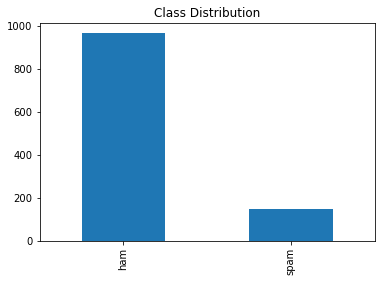

ham     0.866128
spam    0.133872
Name: class, dtype: float64


class                                              text
0   ham                           hope good week checking
1   ham  nice wait texting right gonna pay ticket ya know
2   ham                                              okie
3   ham            yeah quite bit left swing tomorrow get
4   ham                                            number

In [4]:
# Pre-processing already done (e.g. remove punctuations, stopwords, etc.)
df = pd.read_csv('spam.csv', encoding='utf-8')
df = df.dropna()

# Check class distribution
df['class'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.show()
print(df['class'].value_counts(normalize=True))

# Check data
df.head()

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

# Only use top 1000 features, can treat as a hyperparameter in general
vectorizer = CountVectorizer(max_features=1000)

# Design matrix
X = vectorizer.fit_transform(df['text']).toarray()

# Class labels: 0 for ham, 1 for spam
y = pd.get_dummies(df['class'])['spam'].to_numpy() 

In [6]:
pcc = 1.25*sum(df['class'].value_counts(normalize=True)**2)
print("1.25*PCC: %.2f" % pcc)

1.25*PCC: 0.96
